# Flight Price Prediction

<img src="https://media.istockphoto.com/id/2226872854/photo/passenger-plane-taking-off.jpg?s=612x612&w=0&k=20&c=DSYtyPK4rUAai6gAucJs5TuZYb_6hlLb3Rab8290faQ=" alt="Flight Price Prediction" width="120%" height="40%"/>

# INTRODUCTION
* The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# FEATURES
The various features of the cleaned dataset are explained below:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Price: Target variable stores information of the ticket price.

In [84]:
## Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Read the dataset
flight_df = pd.read_excel('/content/flight_price.xlsx')

In [86]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [87]:
##Basic info of the data
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [88]:
## Check the column and rows
flight_df.shape

(10683, 11)

In [89]:
##
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [90]:
## Feature engineering
flight_df['Date'] = flight_df['Date_of_Journey'].str.split('/').str[0]
flight_df['Month'] = flight_df['Date_of_Journey'].str.split('/').str[1]
flight_df['Year'] = flight_df['Date_of_Journey'].str.split('/').str[2]

In [91]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [92]:
# Check the columns
flight_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year'],
      dtype='object')

In [93]:
## Check the information
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [94]:
## Change the data type date, month,year
flight_df['Date'] = flight_df['Date'].astype(int)
flight_df['Month']=flight_df['Month'].astype(int)
flight_df['Year']=flight_df['Year'].astype(int)

In [95]:
## Again check the data type
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [96]:
## Drop the column date_journey
flight_df.drop('Date_of_Journey', axis=1, inplace=True)

In [146]:
# Create a datetime column from Date, Month, and Year
flight_df['Journey_Date'] = pd.to_datetime(flight_df[['Year', 'Month', 'Date']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')


In [147]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,Journey_Date
0,IndiGo,Banglore,New Delhi,2h 50m,1,No info,3897,24,3,2019,1,10,22,20,2019-03-24
1,Air India,Kolkata,Banglore,7h 25m,1,No info,7662,1,5,2019,13,15,5,50,2019-05-01
2,Jet Airways,Delhi,Cochin,19h,1,No info,13882,9,6,2019,4,25,9,25,2019-06-09
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,2019-05-12
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,2019-03-01


In [148]:
# Get the list of columns
cols = flight_df.columns.tolist()

# Remove 'Journey_Date' from the list
cols.remove('Journey_Date')

# Insert 'Journey_Date' at the second position (index 1)
cols.insert(1, 'Journey_Date')

# Reindex the dataframe with the new column order
flight_df = flight_df[cols]

# Display the head of the dataframe to verify the change
display(flight_df.head())

,Airline,Journey_Date,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,1,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,7h 25m,1,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,19h,1,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [151]:
# Convert 'Month' column to text format
flight_df['Month_Text'] = flight_df['Journey_Date'].dt.strftime('%b')

# Display the head of the dataframe to verify the change
display(flight_df.head())

/tmp/ipython-input-313726104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df['Month_Text'] = flight_df['Journey_Date'].dt.strftime('%b')


,Airline,Journey_Date,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,Month_Text
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,1,No info,3897,24,3,2019,1,10,22,20,Mar
1,Air India,2019-05-01,Kolkata,Banglore,7h 25m,1,No info,7662,1,5,2019,13,15,5,50,May
2,Jet Airways,2019-06-09,Delhi,Cochin,19h,1,No info,13882,9,6,2019,4,25,9,25,Jun
3,IndiGo,2019-05-12,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,May
4,IndiGo,2019-03-01,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,Mar


In [101]:
## Change the arrival time in hours, min
flight_df['Arrival_hour'] = pd.to_datetime(flight_df['Arrival_Time']).dt.hour
flight_df['Arrival_min'] = pd.to_datetime(flight_df['Arrival_Time']).dt.minute

/tmp/ipython-input-1736173451.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Arrival_hour'] = pd.to_datetime(flight_df['Arrival_Time']).dt.hour
/tmp/ipython-input-1736173451.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_df['Arrival_min'] = pd.to_datetime(flight_df['Arrival_Time']).dt.minute


In [152]:
# Drop the Month column
flight_df.drop('Month', axis=1, inplace=True)

In [154]:
# Get the list of columns
cols = flight_df.columns.tolist()

# Find the index of 'Date' and 'Month_Text'
date_index = cols.index('Date')
month_text_index = cols.index('Month_Text')

# Remove 'Month_Text' from its current position
cols.pop(month_text_index)

# Insert 'Month_Text' after 'Date'
cols.insert(date_index + 1, 'Month_Text')

# Reindex the dataframe with the new column order
flight_df = flight_df[cols]

# Rename the 'Month_Text' column to 'Month'
flight_df.rename(columns={'Month_Text': 'Month'}, inplace=True)

# Display the head of the dataframe to verify the change
display(flight_df.head())

,Airline,Journey_Date,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,1,No info,3897,24,Mar,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,7h 25m,1,No info,7662,1,May,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,19h,1,No info,13882,9,Jun,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,5h 25m,1,No info,6218,12,May,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,4h 45m,1,No info,13302,1,Mar,2019,21,35,16,50


In [102]:
## Change the data types arrival time
flight_df['Arrival_hour'] = flight_df['Arrival_hour'].astype(int)
flight_df['Arrival_min']=flight_df['Arrival_min'].astype(int)

In [99]:
## Same as the departure time and hour
flight_df['Departure_hour'] = flight_df['Dep_Time'].str.split(':').str[0]
flight_df['Departure_min'] = flight_df['Dep_Time'].str.split(':').str[1]

In [103]:
# Change the data typoes
flight_df['Departure_hour'] = flight_df['Departure_hour'].astype(int)
flight_df['Departure_min']=flight_df['Departure_min'].astype(int)

In [113]:
# Drop the Arrival_Time column
# flight_df.drop('Arrival_Time',axis=1, inplace=True)

In [110]:
flight_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [155]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Journey_Date     10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Duration         10683 non-null  object        
 5   Total_Stops      10683 non-null  int64         
 6   Additional_Info  10683 non-null  object        
 7   Price            10683 non-null  int64         
 8   Date             10683 non-null  int64         
 9   Month            10683 non-null  object        
 10  Year             10683 non-null  int64         
 11  Arrival_hour     10683 non-null  int64         
 12  Arrival_min      10683 non-null  int64         
 13  Departure_hour   10683 non-null  int64         
 14  Departure_min    10683 non-null  int64

In [112]:
flight_df['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [115]:
flight_df[flight_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [121]:
## Fill the nan value
flight_df['Total_Stops'] = flight_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [122]:
flight_df[flight_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [123]:
flight_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,1,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1,No info,13882,9,6,2019,4,25,9,25


In [124]:
## Drop the rout coulmn
flight_df.drop('Route',axis=1, inplace=True)

In [125]:
flight_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,1,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1,No info,7662,1,5,2019,13,15,5,50


In [129]:
flight_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

,Duration
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [131]:
flight_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [132]:
flight_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [133]:
flight_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [134]:
flight_df.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,1,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5


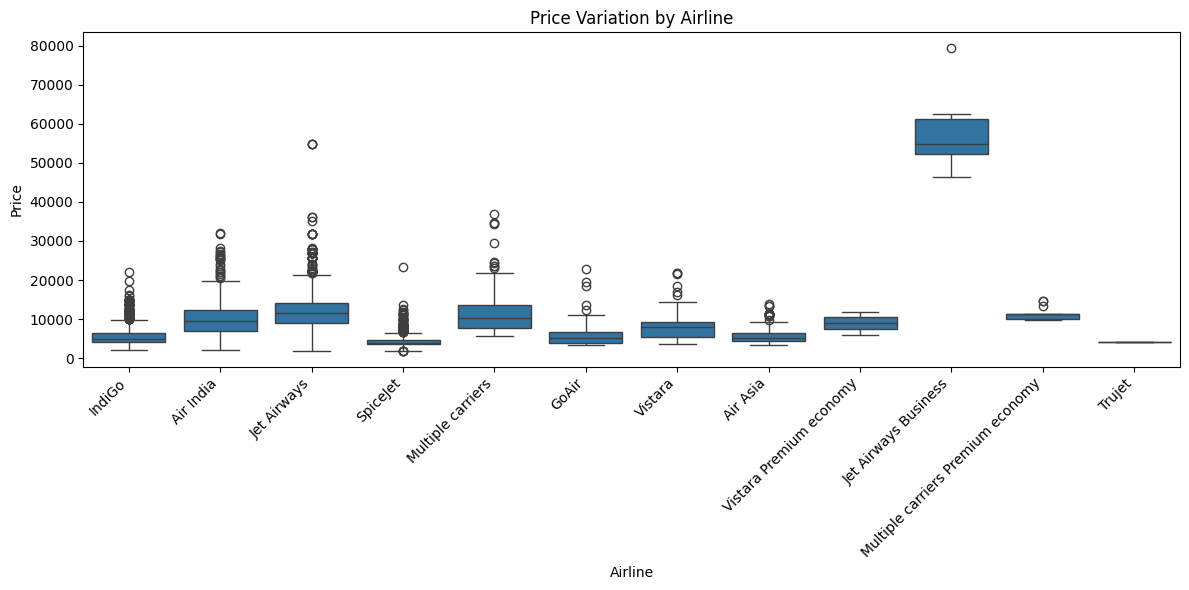

In [135]:
# Does price vary with Airlines?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=flight_df)
plt.xticks(rotation=45, ha='right')
plt.title('Price Variation by Airline')
plt.tight_layout()
plt.show()

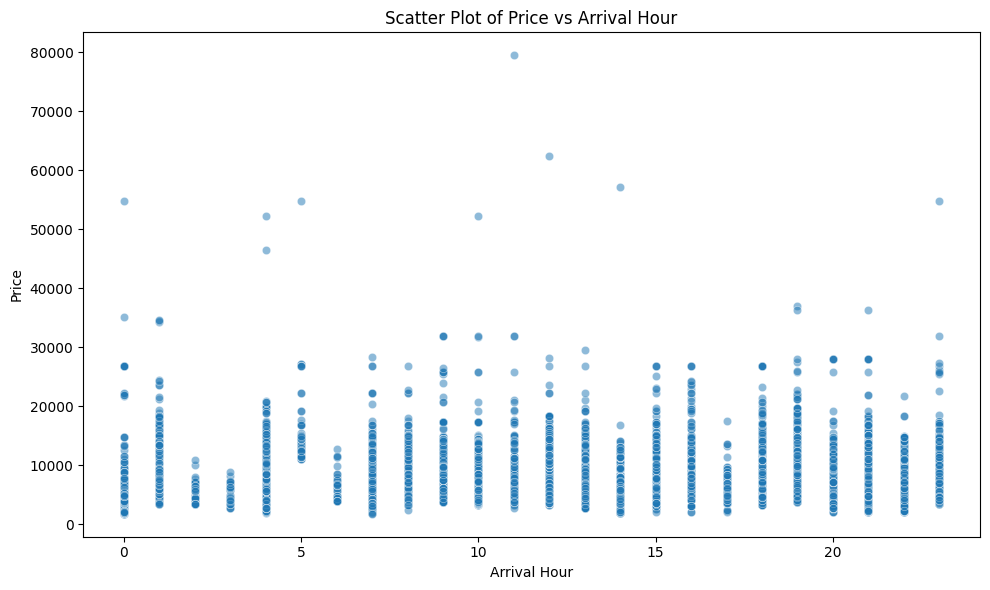

In [159]:
# Scatter plot of Arrival Hour vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arrival_hour', y='Price', data=flight_df, alpha=0.5)
plt.title('Scatter Plot of Price vs Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

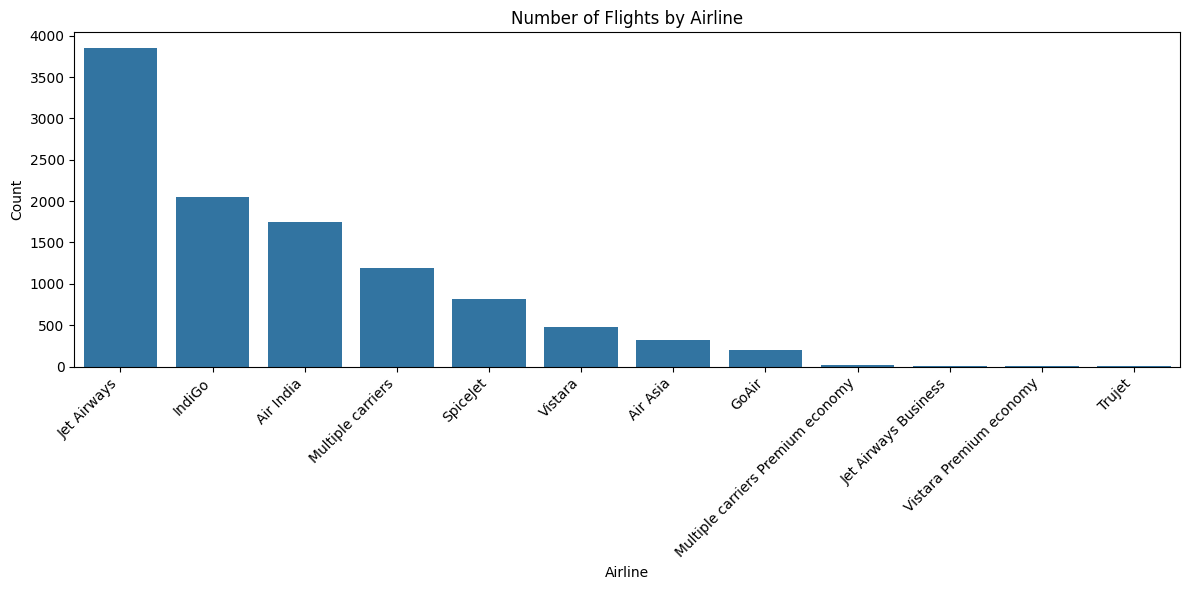

In [160]:
# Bar plot of flight counts by Airline
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', data=flight_df, order=flight_df['Airline'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

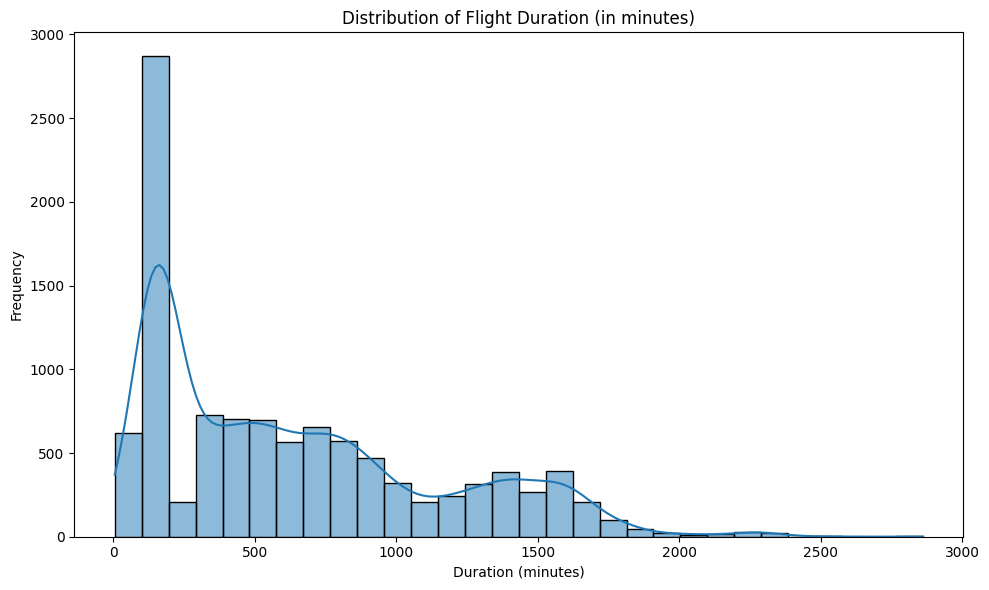

In [163]:
# Histplot of Duration distribution
# First, convert 'Duration' to numerical format if not already done.
# Assuming 'Duration' is in 'Xh Ym' or 'Xh' or 'Ym' format.
def convert_duration_to_minutes(duration):
    if pd.isna(duration):
        return np.nan
    parts = duration.split(' ')
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

flight_df['Duration_minutes'] = flight_df['Duration'].apply(convert_duration_to_minutes)

plt.figure(figsize=(10, 6))
sns.histplot(flight_df['Duration_minutes'].dropna(), bins=30, kde=True)
plt.title('Distribution of Flight Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Conclusion

Based on the analysis of the flight price dataset, we can draw the following conclusions:

*   **Airline Prices:** There is a significant variation in ticket prices across different airlines. Some airlines generally have higher prices than others.
*   **Last-Minute Bookings:** Booking flights closer to the departure date tends to result in higher prices, as seen in the distribution of prices for last-minute flights.
*   **Departure and Arrival Times:** Flight prices can be influenced by the time of departure and arrival. Certain hours of the day may have higher or lower average prices.
*   **Flight Frequency:** The bar plot showed the distribution of flights across different airlines, indicating the market share or operational scale of each airline.
*   **Flight Duration:** The histogram of flight durations provided insights into the typical length of flights in the dataset.

These findings can be valuable for passengers to make informed decisions when booking flights and for airlines to understand pricing strategies and market dynamics.